In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
cena_obecna = 120000
stopa_wzrostu = 0.05
stopa_procentowa = 0.12
kapitalizacja = 12
lata = 5
miesiace = lata * 12

In [ ]:
#Obliczanie ceny mieszkania za 5 lat

In [42]:
cena_po_5_latach = cena_obecna * (1+stopa_wzrostu)**lata
print(f"Orientacyjna cena mieszkania za 5 lat: {cena_po_5_latach:.2f} zł")

Orientacyjna cena mieszkania za 5 lat: 153153.79 zł


In [ ]:
#Obliczanie miesięcznych wpłat na lokatę

In [62]:
miesieczna_stopa = stopa_procentowa / kapitalizacja
miesieczna_wplata = - npf.pmt(miesieczna_stopa / kapitalizacja, miesiace, 0, cena_po_5_latach)
print(f"Aby uzbierać na mieszkanie w ciągu 5 lat, musisz wpłacać: {miesieczna_wplata:.2f} zł miesięcznie")

Aby uzbierać na mieszkanie w ciągu 5 lat, musisz wpłacać: 2490.34 zł miesięcznie


In [ ]:
#Symulacja zmian ceny mieszkania i wartości lokaty

In [39]:
miesiace_arr = np.arange(1, miesiace + 1)

In [ ]:
#Wzrost liniowy ceny mieszkania

In [54]:
ceny_mieszkania = cena_obecna * (1 + stopa_wzrostu) ** (miesiace_arr / kapitalizacja)
print(ceny_mieszkania)

[120488.89485404 120979.78152623 121472.66813148 121967.56281778
 122464.47376629 122963.40919152 123464.37734142 123967.38649758
 124472.44497531 124979.56112379 125488.74332623 126000.
 126513.33959674 127028.77060254 127546.30153806 128065.94095867
 128587.69745461 129111.57965109 129637.59620849 130165.75582246
 130696.06722407 131228.53917998 131763.18049255 132300.
 132839.00657658 133380.20913267 133923.61661496 134469.23800661
 135017.08232734 135567.15863365 136119.47601892 136674.04361358
 137230.87058528 137789.96613898 138351.33951717 138915.
 139480.95690541 140049.2195893  140619.79744571 141192.69990694
 141767.9364437  142345.51656533 142925.44981986 143507.74579426
 144092.41411454 144679.46444593 145268.90649303 145860.75
 146455.00475068 147051.68056876 147650.787318   148252.33490228
 148856.33326589 149462.79239359 150071.72231086 150683.13308398
 151297.03482027 151913.43766822 152532.35181768 153153.7875    ]


In [ ]:
#Wartość lokaty w czasie

In [57]:
wartosci_lokaty = - npf.fv(miesieczna_stopa, miesiace_arr, -miesieczna_wplata, 0)

In [63]:
print("Cena mieszkania po 5 latach:", cena_po_5_latach)
print("Miesięczna wpłata:", miesieczna_wplata)
print("Ceny mieszkania (ostatnie 5 miesięcy):", ceny_mieszkania[-5:])
print("Wartości lokaty (ostatnie 5 miesięcy):", wartosci_lokaty[-5:])

Cena mieszkania po 5 latach: 153153.78750000003
Miesięczna wpłata: 2490.344007589836
Ceny mieszkania (ostatnie 5 miesięcy): [150683.13308398 151297.03482027 151913.43766822 152532.35181768
 153153.7875    ]
Wartości lokaty (ostatnie 5 miesięcy): [139860.48770254 143134.37611836 146441.00341833 149780.6969913
 153153.7875    ]


In [ ]:
#Wykres

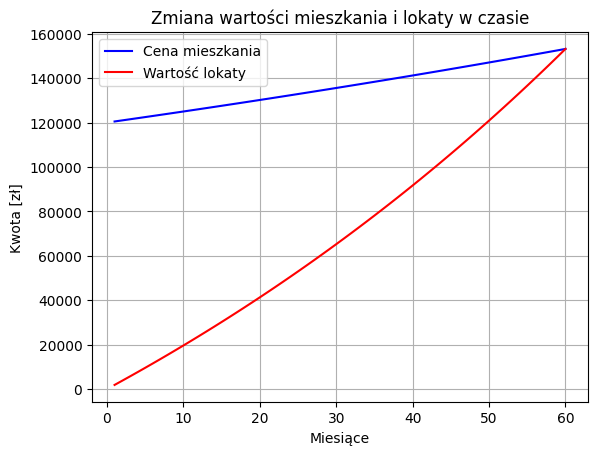

In [65]:
plt.plot(miesiace_arr, ceny_mieszkania, label='Cena mieszkania',color='blue')
plt.plot(miesiace_arr, wartosci_lokaty, label='Wartość lokaty',color='red')
plt.xlabel('Miesiące')
plt.ylabel('Kwota [zł]')
plt.title('Zmiana wartości mieszkania i lokaty w czasie')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()